In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("train.csv")
df2 = pd.read_csv("test.csv")

In [3]:
df = pd.concat([df1, df2], ignore_index=True)

In [4]:
def check_duplicates(df):
    duplicate_rows = df[df.duplicated()]

    if not duplicate_rows.empty:
        print("Total duplicate rows:", len(duplicate_rows))
        for column in df.columns:
            print(f"Number of duplicates in {column}: {df[column].duplicated().sum()}")
    else:
        print("No duplicates found!")

In [5]:
def draw_categorical_plot(data, figsize=(8, 6), colors=None):
    
    if not isinstance(data, pd.Series):
        raise ValueError("Input data should be a categorical data.")
    
    # Count the occurrences of each category in the data
    counts = data.value_counts()
    
    # Create a figure and axes
    fig, ax = plt.subplots(figsize=figsize)
    
    # If there are less than 6 unique observations, draw a pie chart
    if len(counts) <= 5:
        counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, ax=ax)
        ax.set_title("Pie Chart of " + data.name)
        ax.set_ylabel("")  # This is to remove the column name from the side of the pie chart
    else:
        # Otherwise, draw a bar chart
        sns.barplot(x=counts.index, y=counts.values, palette=colors, ax=ax)
        ax.set_title("Bar Chart of " + data.name)
        ax.set_ylabel("Count")
    
    plt.tight_layout()
    plt.show()  # Display the plot

In [6]:
def plot_data(df, numeric_col, category_col=None):
    plt.figure(figsize=(10, 8))
    
    # Plotting histogram using seaborn
    sns.histplot(data=df, x=numeric_col, kde=True, hue=category_col)
    
    plt.title(f'Distribution of {numeric_col}')
    plt.ylabel('Frequency')
    plt.xlabel(numeric_col)
    plt.show()

In [7]:
# For Numeric data
def draw_numeric_plot(data):
    
    num_unique = data.nunique()
    
    if num_unique == 2:
        # Donut chart
        plt.figure(figsize=(8, 6))
        # Extract the value counts and labels
        counts = data.value_counts()
        labels = counts.index

        # Plot
        wedges, texts, autotexts = plt.pie(counts, labels=labels, wedgeprops=dict(width=0.4), 
                                           autopct='%1.1f%%', startangle=140, pctdistance=0.85)
    
        # Draw center circle for 'donut' style
        centre_circle = plt.Circle((0,0),0.70,fc='white')
        plt.gca().add_artist(centre_circle)

        # Improve text visibility
        for text, autotext in zip(texts, autotexts):
            text.set(size=12)
            autotext.set(size=12)

        plt.title(f"Donut Chart of {data.name}")
        plt.ylabel("")  # Remove automatic label
        plt.legend(loc="best")  # Display a legend
    
    elif 3 <= num_unique <= 50:
        # Bar chart
        plt.figure(figsize=(12, 6))
        data.value_counts().sort_index().plot(kind='bar', color='skyblue')
        plt.title(f"Bar Chart for {data.name}")
        plt.ylabel("Frequency")
        plt.xlabel(data.name)
    
    elif 51 <= num_unique < 90:
        # Simple histogram
        plt.figure(figsize=(12, 6))
        plt.hist(data, bins=30, edgecolor='black', color='skyblue')
        plt.title(f"Histogram of {data.name}")
        plt.ylabel("Frequency")
        plt.xlabel(data.name)
    
    elif num_unique >= 90:
        # Histogram and boxplot
        fig, ax = plt.subplots(1, 2, figsize=(15, 6))
        
        ax[0].hist(data, bins=30, edgecolor='black', color='skyblue')
        ax[0].set_title(f"Histogram of {data.name}")
        ax[0].set_ylabel("Frequency")
        ax[0].set_xlabel(data.name)
        
        ax[1].boxplot(data, vert=False)
        ax[1].set_title(f"Boxplot of {data.name}")
        ax[1].set_yticklabels([data.name])
    
    plt.tight_layout()
    plt.show()

In [8]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [9]:
print('Data type for each column::')
print('='*49)
df.info()

Data type for each column::
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   object 
 3   international_plan             5000 non-null   object 
 4   voice_mail_plan                5000 non-null   object 
 5   number_vmail_messages          5000 non-null   int64  
 6   total_day_minutes              5000 non-null   float64
 7   total_day_calls                5000 non-null   int64  
 8   total_day_charge               5000 non-null   float64
 9   total_eve_minutes              5000 non-null   float64
 10  total_eve_calls                5000 non-null   int64  
 11  total_eve_charge               5000 non-null   float64
 12  total_night_minutes 

In [10]:
print('Uniqueness of each column::')
df.nunique()

Uniqueness of each column::


state                              51
account_length                    218
area_code                           3
international_plan                  2
voice_mail_plan                     2
number_vmail_messages              48
total_day_minutes                1961
total_day_calls                   123
total_day_charge                 1961
total_eve_minutes                1879
total_eve_calls                   126
total_eve_charge                 1659
total_night_minutes              1853
total_night_calls                 131
total_night_charge               1028
total_intl_minutes                170
total_intl_calls                   21
total_intl_charge                 170
number_customer_service_calls      10
churn                               2
dtype: int64

In [11]:
print('This is the Shape of the data')
print('='*49)
print("The total number of columns: ", df.shape[1])
print("The total number of rows: ", df.shape[0])
print('='*49)

This is the Shape of the data
The total number of columns:  20
The total number of rows:  5000


In [12]:
# Calculate the number of missing values for each feature
missing_values = df.isnull().sum()

# Filter out features without missing values
missing_values = missing_values[missing_values > 0]

# Display missing values
if not missing_values.empty:
    print("Number of missing values for each feature:")
    print(missing_values)
else:
    print("No missing values detected in the dataset!")

Number of missing values for each feature:
churn    750
dtype: int64


In [13]:
df['churn'].fillna(method='ffill', inplace=True)  # Forward fill

In [14]:
print("Dataset:: ")
df.head()

Dataset:: 


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [15]:
print('Description of the Categorical Dataset:')
df.describe(include=['object', 'bool']).T

Description of the Categorical Dataset:


,count,unique,top,freq
state,5000,51,WV,158
area_code,5000,3,area_code_415,2495
international_plan,5000,2,no,4527
voice_mail_plan,5000,2,no,3677
churn,5000,2,no,4402


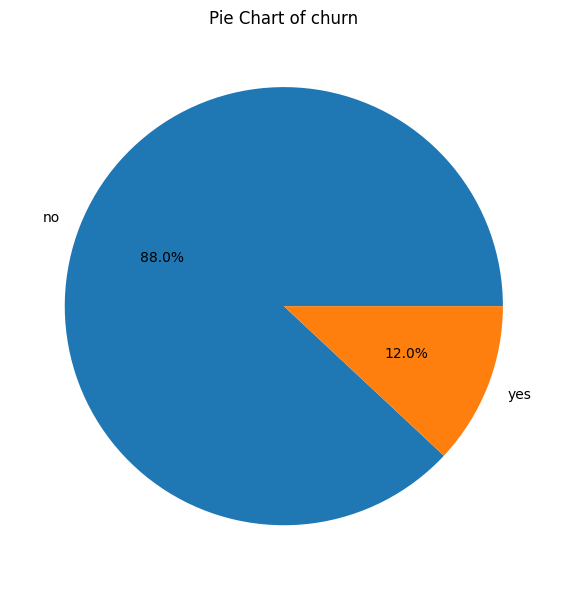

In [16]:
draw_categorical_plot(df['churn'])

<Axes: xlabel='voice_mail_plan', ylabel='count'>

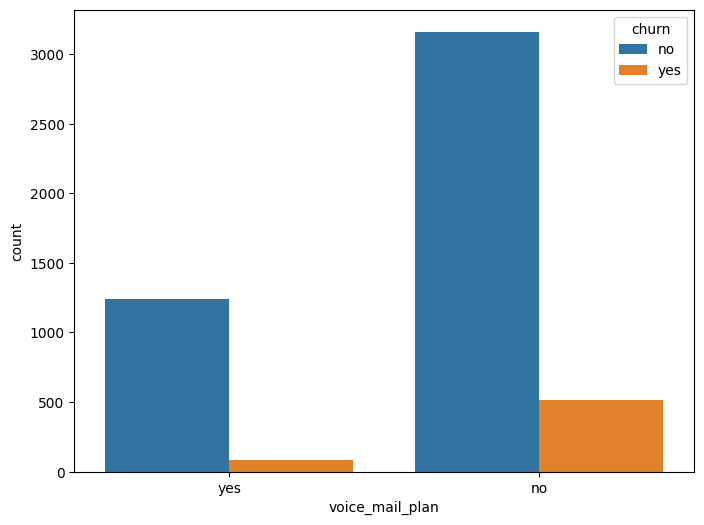

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x = 'voice_mail_plan', hue = 'churn')

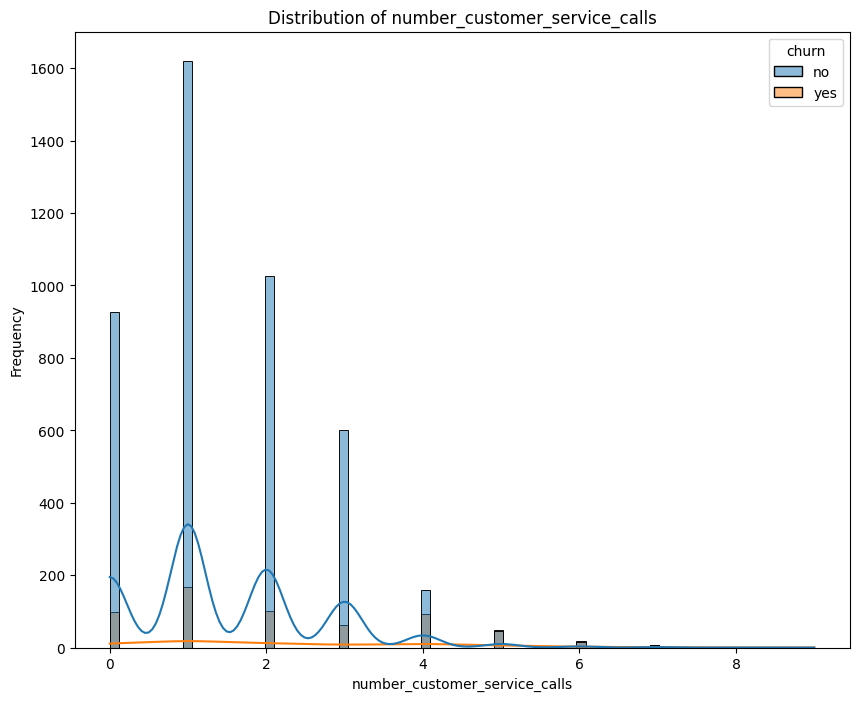

In [18]:
plot_data(df, 'number_customer_service_calls', 'churn')

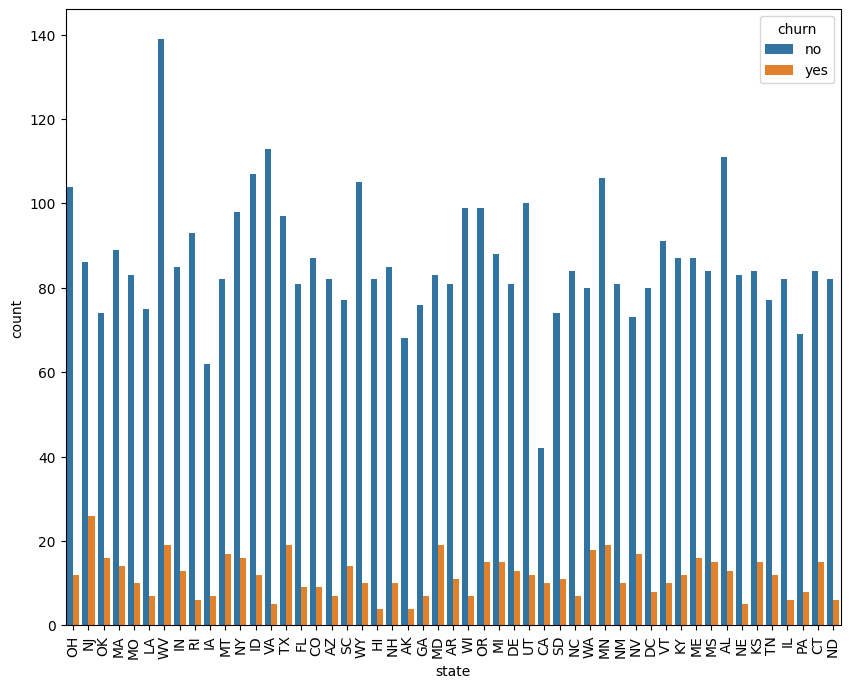

In [20]:
plt.figure(figsize=(10, 8))
sns.countplot(x='state', hue='churn', data=df)
plt.xticks(rotation=90)
plt.show()

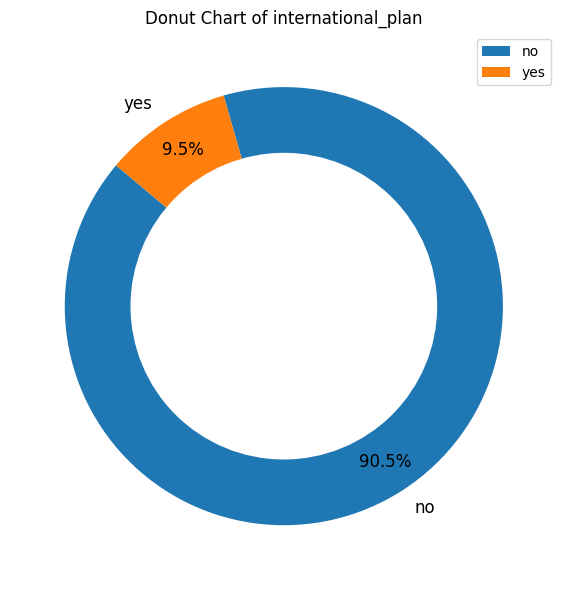

In [21]:
draw_numeric_plot(df['international_plan'])

<Axes: xlabel='international_plan', ylabel='count'>

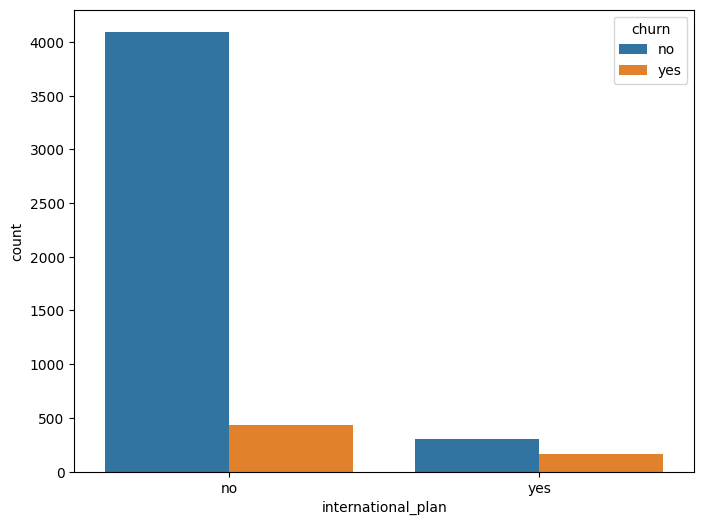

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x = 'international_plan', hue = 'churn')

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,5000.0,100.258600,39.694560,1.0,73.000,100.00,127.00,243.00
number_vmail_messages,5000.0,7.755200,13.546393,0.0,0.000,0.00,17.00,52.00
total_day_minutes,5000.0,180.288900,53.894699,0.0,143.700,180.10,216.20,351.50
total_day_calls,5000.0,100.029400,19.831197,0.0,87.000,100.00,113.00,165.00
total_day_charge,5000.0,30.649668,9.162069,0.0,24.430,30.62,36.75,59.76
total_eve_minutes,5000.0,200.636560,50.551309,0.0,166.375,201.00,234.10,363.70
total_eve_calls,5000.0,100.191000,19.826496,0.0,87.000,100.00,114.00,170.00
total_eve_charge,5000.0,17.054322,4.296843,0.0,14.140,17.09,19.90,30.91
total_night_minutes,5000.0,200.391620,50.527789,0.0,166.900,200.40,234.70,395.00
total_night_calls,5000.0,99.919200,19.958686,0.0,87.000,100.00,113.00,175.00


In [24]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['voice_mail_plan'], df['churn'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")

Chi2 value: 55.982257301214204
P-value: 7.31280001849307e-14


In [25]:
contingency_table = pd.crosstab(df['international_plan'], df['churn'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")

Chi2 value: 267.9867306260571
P-value: 3.1167252119878826e-60


In [26]:
# Using 'Voice mail plan' as the categorical feature and 'Churn' as the target
contingency_table = pd.crosstab(df['state'], df['churn'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")

Chi2 value: 82.29066588437459
P-value: 0.0027168199523006963


In [27]:
# Calculate Q1, Q3, and IQR for each numeric column in df
Q1 = df.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = df.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1

# Align DataFrame and Series for comparison
df_aligned, IQR_low_aligned = df.align(Q1 - 1.5 * IQR, axis=1)
_, IQR_high_aligned = df.align(Q3 + 1.5 * IQR, axis=1)

# Apply the IQR formula. This will return a DataFrame with boolean values indicating whether each value is an outlier
outliers_df = ((df_aligned < IQR_low_aligned) | (df_aligned > IQR_high_aligned))

# Check if any row contains at least one outlier
outliers = outliers_df.any(axis=1)

In [28]:
print(f"Number of rows containing outliers: {sum(outliers)}")

Number of rows containing outliers: 840


In [29]:
df.replace(["no", "yes"], [0, 1], inplace=True)
df.replace([False, True], [0, 1], inplace=True)

In [30]:
# Mapping dictionary
area_code_mapping = {
    415: 2,
    510: 1,
    408: 0
}

# Extract numeric part of the 'area_code' column
df['area_code'] = df['area_code'].str.extract('(\d+)').astype(int)  # Extract numbers and convert to int

# Replace with the mapped values
df['area_code'] = df['area_code'].replace(area_code_mapping)

In [31]:
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,2,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,2,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,2,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,1,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,GA,130,2,0,0,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0,0
4996,WA,73,0,0,0,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3,0
4997,WV,152,2,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,0
4998,DC,61,2,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0


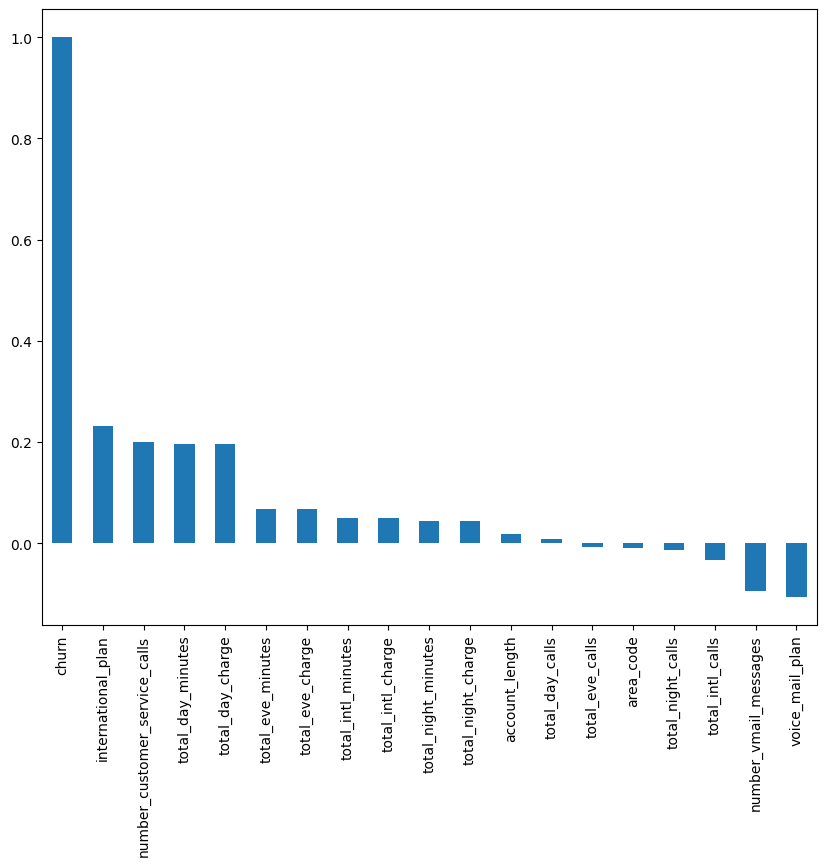

In [32]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation
target_corr = numeric_df.corr()['churn'].sort_values(ascending=False)

# Plot the correlation
plt.figure(figsize=(10, 8))
target_corr.plot(kind='bar')
plt.show()

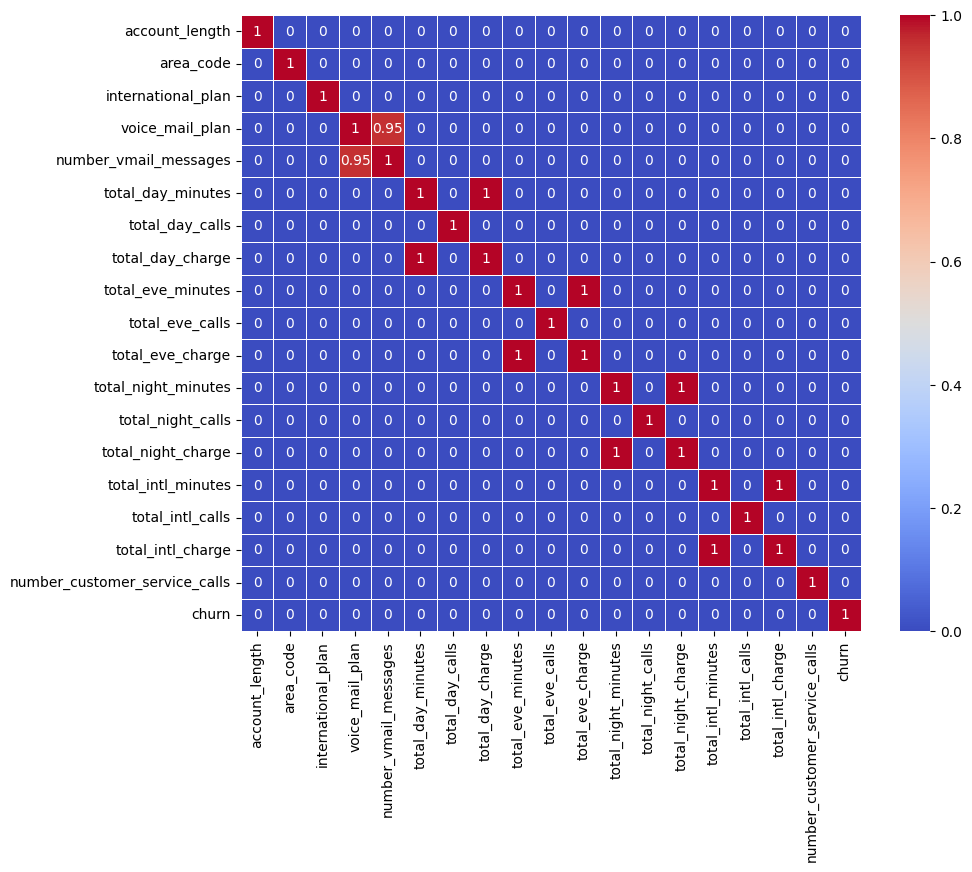

In [33]:
# Compute the correlation
corr = numeric_df.corr()

# Filter for high correlations
high_corr = corr[abs(corr) > 0.5].fillna(0)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(high_corr, cmap='coolwarm', annot=True, linewidths=.5)
plt.show()

In [34]:
to_drop = ['state', 'total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes']

In [35]:
df.drop(to_drop, axis = 1, inplace = True)

In [36]:
print('Dataset::')
df.head()

Dataset::


,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,2,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
1,137,2,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
2,84,0,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
3,75,2,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0
4,121,1,0,1,24,88,37.09,108,29.62,118,9.57,7,2.03,3,0


In [37]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df.drop('churn', axis=1)   # Features
y = df['churn']                # Target variable

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42, stratify=y)

In [39]:
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  # Import KNN
from sklearn.tree import DecisionTreeClassifier


# Logistic Regression Pipeline
logreg_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', LogisticRegression(random_state=42))
])

# K-Nearest Neighbors Pipeline
knn_pipeline = Pipeline([
    ('scaler', RobustScaler()),  # Scale the data (important for KNN)
    ('classifier', KNeighborsClassifier(n_neighbors=5))  # You can customize 'n_neighbors'
])

dt_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Train Logistic Regression
logreg_pipeline.fit(X_train, y_train)
logreg_predictions = logreg_pipeline.predict(X_test)

# Train K-Nearest Neighbors
knn_pipeline.fit(X_train, y_train)
knn_predictions = knn_pipeline.predict(X_test)

# Train Decision Tree
dt_pipeline.fit(X_train, y_train)
dt_predictions = dt_pipeline.predict(X_test)

In [41]:
from sklearn.metrics import classification_report, accuracy_score

# Predict using the models
logreg_predictions = logreg_pipeline.predict(X_test)
knn_predictions = knn_pipeline.predict(X_test)
dt_predictions = dt_pipeline.predict(X_test)

# Generate classification reports
logreg_report = classification_report(y_test, logreg_predictions, output_dict=True)
knn_report = classification_report(y_test, knn_predictions, output_dict=True)
dt_report = classification_report(y_test, dt_predictions, output_dict=True)

# Calculate accuracies
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Determine the best model based on accuracy
accuracies = {
    'Logistic Regression': logreg_accuracy,
    'KNN': knn_accuracy,
    'Decision Tree': dt_accuracy,
}

# Determine the best model based on accuracy
best_model_name = max(accuracies, key=accuracies.get)
best_model_pipeline = None  # Initialize this variable

if best_model_name == 'KNN':
    best_model_predictions = knn_predictions
    best_model_pipeline = knn_pipeline  # Set the pipeline
elif best_model_name == 'Logistic Regression':
    best_model_predictions = logreg_predictions
    best_model_pipeline = logreg_pipeline  # Set the pipeline
elif best_model_name == 'Decision Tree':
    best_model_predictions = dt_predictions
    best_model_pipeline = dt_pipeline  # Set the pipeline

# Create the result_df DataFrame
result_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': best_model_predictions
})

print(f"The best model is {best_model_name} with an accuracy of {accuracies[best_model_name]:.2f}")

The best model is Decision Tree with an accuracy of 0.90


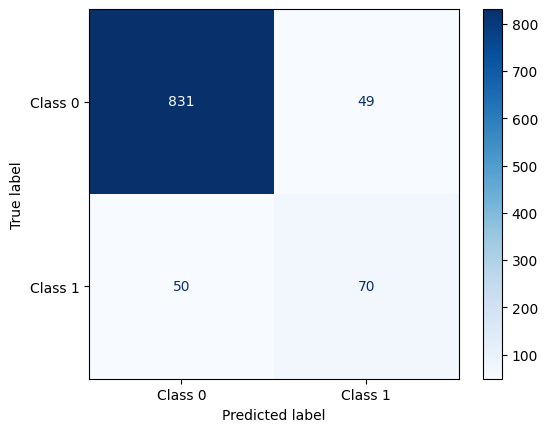

<Figure size 600x500 with 0 Axes>

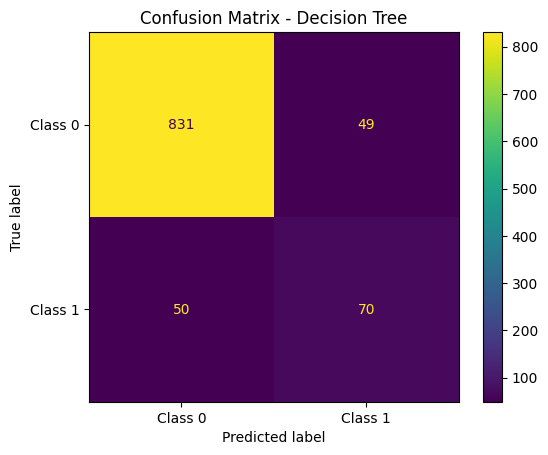

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(dt_pipeline, X_test, y_test, display_labels=['Class 0', 'Class 1'], cmap='Blues')
plt.figure(figsize=(6, 5))
disp.plot()
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [43]:
def extract_metrics(report):
    """Extracts the desired metrics from the classification report."""
    return {
        'Accuracy': report['accuracy'],
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-score': report['weighted avg']['f1-score']
    }

# List of models and their reports
models = ['Logistic Regression', 'KNN', 'Decision Tree']
reports = [logreg_report, knn_report, dt_report]

# Populate metrics data using list comprehensions
metrics_data = {
    'Model': models,
    'Accuracy': [extract_metrics(report)['Accuracy'] for report in reports],
    'Precision': [extract_metrics(report)['Precision'] for report in reports],
    'Recall': [extract_metrics(report)['Recall'] for report in reports],
    'F1-score': [extract_metrics(report)['F1-score'] for report in reports]
}

# Create the DataFrame
metrics_df = pd.DataFrame(metrics_data)

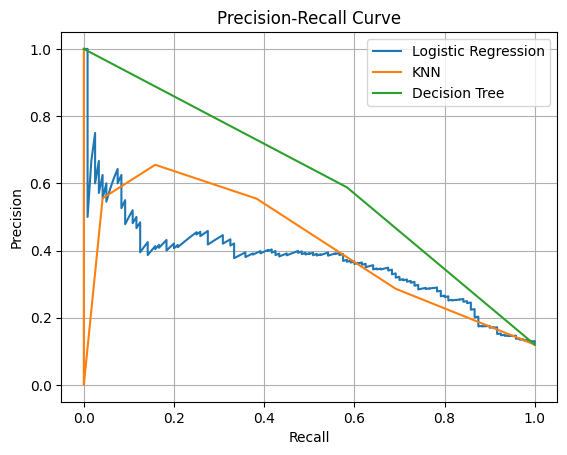

In [44]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve values for Logistic Regression
logreg_probs = logreg_pipeline.predict_proba(X_test)[:, 1]
logreg_precision, logreg_recall, _ = precision_recall_curve(y_test, logreg_probs)
plt.plot(logreg_recall, logreg_precision, label='Logistic Regression')

# Compute Precision-Recall curve values for KNN
knn_probs = knn_pipeline.predict_proba(X_test)[:, 1]
knn_precision, knn_recall, _ = precision_recall_curve(y_test, knn_probs)
plt.plot(knn_recall, knn_precision, label='KNN')

# Compute Precision-Recall curve values for Decision Tree
dt_probs = dt_pipeline.predict_proba(X_test)[:, 1]
dt_precision, dt_recall, _ = precision_recall_curve(y_test, dt_probs)
plt.plot(dt_recall, dt_precision, label='Decision Tree')

# Other plot configurations
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
def color_cells(val):
    if val == metrics_df['F1-score'].max():
        color = 'green'
    elif val == metrics_df['F1-score'].min():
        color = 'orange'
    else:
        color = 'black'
    return f'color: {color}'

colored_df = metrics_df.style.applymap(color_cells, subset=['F1-score'])
colored_df

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.873000,0.832698,0.873000,0.842290
1,KNN,0.889000,0.867086,0.889000,0.857833
2,Decision Tree,0.901000,0.900645,0.901000,0.900821


In [46]:
# Apply StratifiedKFold on the best model and compute cross-validated F1 scores.

from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define number of splits
n_splits = 5

# Create StratifiedKFold object
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Compute cross-validated F1 scores using StratifiedKFold for the best model
f1_scores_cross_val = cross_val_score(best_model_pipeline, X, y, scoring='f1', cv=skf)

# Print the F1 scores for each fold
for fold, score in enumerate(f1_scores_cross_val, 1):
    print(f"Fold {fold}: F1 Score = {score:.4f}")

# Print the average F1 score
print(f"\nAverage F1 Score from cross-validation: {f1_scores_cross_val.mean():.4f}")

Fold 1: F1 Score = 0.5726
Fold 2: F1 Score = 0.6116
Fold 3: F1 Score = 0.6019
Fold 4: F1 Score = 0.5820
Fold 5: F1 Score = 0.5726

Average F1 Score from cross-validation: 0.5881


In [47]:
result_df.head()

,Actual,Predicted
3932,0,0
2246,0,0
525,0,0
659,0,0
2272,0,0


Length of feature names: 14
Length of importances: 14


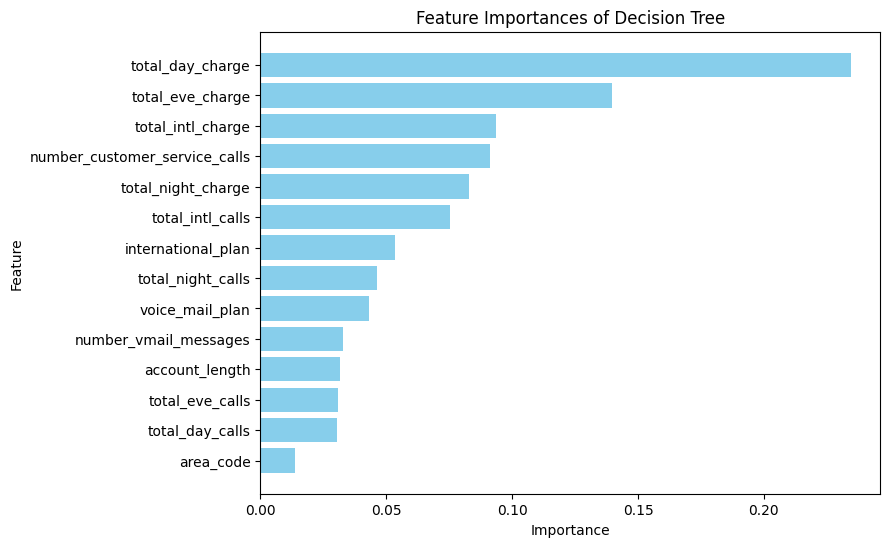

In [48]:
def get_feature_names(X_original, model_features):
    if len(X_original.columns) != len(model_features):
        print(f"Length of original data: {len(X_original.columns)}")
        print(f"Length of model's feature importances: {len(model_features)}")
        missing_count = abs(len(X_original.columns) - len(model_features))
        additional_cols = ["unknown_feature_" + str(i) for i in range(1, missing_count + 1)]
        return X_original.columns.tolist() + additional_cols
    else:
        return X_original.columns.tolist()

if hasattr(best_model_pipeline.named_steps['classifier'], 'feature_importances_'):
    importances = best_model_pipeline.named_steps['classifier'].feature_importances_
    
    # Use the function to get feature names
    feature_names = get_feature_names(df.drop('churn', axis=1), importances)
    
    # Check lengths for debugging
    print(f"Length of feature names: {len(feature_names)}")
    print(f"Length of importances: {len(importances)}")
    
    # Create the feature importances DataFrame
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=True)
    
    # Plotting
    plt.figure(figsize=(8, 6))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(f'Feature Importances of {best_model_name}')
    plt.show()

else:
    print(f"{best_model_name} does not have feature_importances_ attribute.")